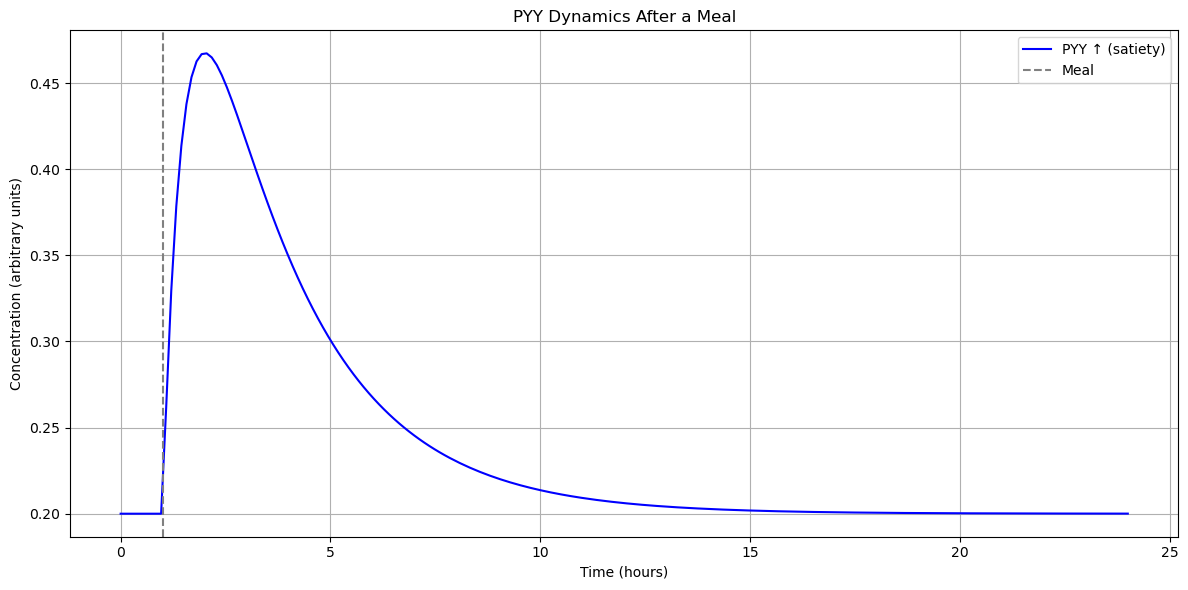

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Meal parameters
t_meal = 1.0  # Meal at 1 hour

# Time vector (0 to 5 hours)
t = np.linspace(0, 24, 200)

# PYY: satiety hormone, increases after meal
def pyy_model(P, t):
    baseline = 0.2
    k_decay = 0.4  # Decay rate back to baseline after meal
    
    # Meal triggers a spike in PYY after t_meal
    meal_effect = 0.8 * np.exp(-2 * (t - t_meal)) if t >= t_meal else 0
    
    # Rate of change of PYY
    dPdt = -k_decay * (P - baseline) + meal_effect
    return dPdt

# Combined ODE system with only PYY
def hormone_system(y, t):
    pyy = y[0]
    return [pyy_model(pyy, t)]

# Initial value for PYY (baseline)
y0 = [0.2]  # Initial concentration for PYY

# Solve the system using odeint
sol = odeint(hormone_system, y0, t)
pyy = sol.flatten()

# -------------------------------
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(t, pyy, label='PYY ↑ (satiety)', color='blue')
plt.axvline(t_meal, color='gray', linestyle='--', label='Meal')
plt.title('PYY Dynamics After a Meal')
plt.xlabel('Time (hours)')
plt.ylabel('Concentration (arbitrary units)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
